In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

## Merging on one variable

In [72]:
gd = pd.read_csv("gundeaths.csv")
gd

,YEAR,STATE,RATE,DEATHS,URL
0,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
1,2019,AK,24.4,179,/nchs/pressroom/states/alaska/ak.htm
2,2019,AZ,15.1,1136,/nchs/pressroom/states/arizona/az.htm
3,2019,AR,19.3,580,/nchs/pressroom/states/arkansas/ar.htm
4,2019,CA,7.2,2945,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
345,2005,VA,11.5,888,/nchs/pressroom/states/virginia/virginia.htm
346,2005,WA,8.8,567,/nchs/pressroom/states/washington/washington.htm
347,2005,WV,13.8,261,/nchs/pressroom/states/westvirginia/westvirgin...
348,2005,WI,8.5,474,/nchs/pressroom/states/wisconsin/wisconsin.htm


<AxesSubplot:xlabel='YEAR', ylabel='RATE'>

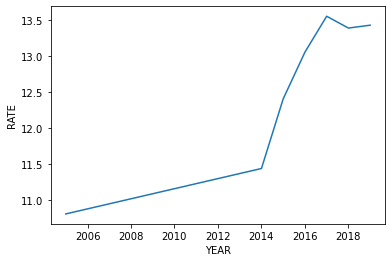

In [33]:
sns.lineplot(x='YEAR', y='RATE', data=gd, ci=None)

<AxesSubplot:xlabel='YEAR', ylabel='RATE'>

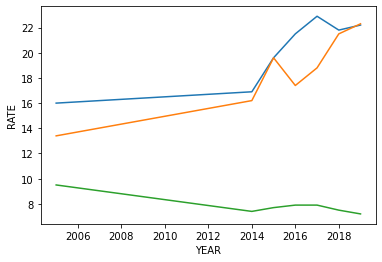

In [34]:
sns.lineplot(x='YEAR', y='RATE', data=gd[gd.STATE=="AL"], ci=None)
sns.lineplot(x='YEAR', y='RATE', data=gd[gd.STATE=="WY"], ci=None)
sns.lineplot(x='YEAR', y='RATE', data=gd[gd.STATE=="CA"], ci=None)

In [44]:
go = pd.read_csv("gunowner2021.csv")
go

,State,gunOwnership,totalGuns
0,Montana,0.663,22133
1,Wyoming,0.662,132806
2,Alaska,0.645,15824
3,Idaho,0.601,49566
4,West Virginia,0.585,35264
5,Arkansas,0.572,79841
6,Mississippi,0.558,35494
7,Alabama,0.555,161641
8,South Dakota,0.553,21130
9,North Dakota,0.551,13272


In [45]:
crosswalk = pd.read_csv("crosswalk.csv")
crosswalk

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [46]:
merge1 = pd.merge(go, crosswalk, on="State")
merge1

,State,gunOwnership,totalGuns,Abbrev,Code
0,Montana,0.663,22133,Mont.,MT
1,Wyoming,0.662,132806,Wyo.,WY
2,Alaska,0.645,15824,Alaska,AK
3,Idaho,0.601,49566,Idaho,ID
4,West Virginia,0.585,35264,W.Va.,WV
5,Arkansas,0.572,79841,Ark.,AR
6,Mississippi,0.558,35494,Miss.,MS
7,Alabama,0.555,161641,Ala.,AL
8,South Dakota,0.553,21130,S.D.,SD
9,North Dakota,0.551,13272,N.D.,ND


In [47]:
merge2 = pd.merge(go, crosswalk, on="State", how="right")
merge2

,State,gunOwnership,totalGuns,Abbrev,Code
0,Alabama,0.555,161641.0,Ala.,AL
1,Alaska,0.645,15824.0,Alaska,AK
2,Arizona,0.463,179738.0,Ariz.,AZ
3,Arkansas,0.572,79841.0,Ark.,AR
4,California,0.283,344622.0,Calif.,CA
5,Colorado,0.451,92435.0,Colo.,CO
6,Connecticut,0.236,82400.0,Conn.,CT
7,Delaware,0.344,4852.0,Del.,DE
8,District of Columbia,NaN,NaN,D.C.,DC
9,Florida,0.353,343288.0,Fla.,FL


In [48]:
merge1.shape

(50, 5)

In [49]:
merge2.shape

(51, 5)

In [50]:
gd2019 = gd[gd.YEAR == 2019]
gd2019.shape

(50, 5)

In [51]:
gd2019

,YEAR,STATE,RATE,DEATHS,URL
0,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
1,2019,AK,24.4,179,/nchs/pressroom/states/alaska/ak.htm
2,2019,AZ,15.1,1136,/nchs/pressroom/states/arizona/az.htm
3,2019,AR,19.3,580,/nchs/pressroom/states/arkansas/ar.htm
4,2019,CA,7.2,2945,/nchs/pressroom/states/california/ca.htm
5,2019,CO,14.2,846,/nchs/pressroom/states/colorado/co.htm
6,2019,CT,5.3,190,/nchs/pressroom/states/connecticut/ct.htm
7,2019,DE,9.9,93,/nchs/pressroom/states/delaware/de.htm
8,2019,FL,12.7,2872,/nchs/pressroom/states/florida/fl.htm
9,2019,GA,15.8,1695,/nchs/pressroom/states/georgia/ga.htm


In [52]:
gd2019 = gd2019.drop(["URL", "YEAR", "DEATHS"], axis=1)

In [53]:
gd2019

,STATE,RATE
0,AL,22.2
1,AK,24.4
2,AZ,15.1
3,AR,19.3
4,CA,7.2
5,CO,14.2
6,CT,5.3
7,DE,9.9
8,FL,12.7
9,GA,15.8


In [64]:
gd2019 = gd2019.rename({'STATE':"Code"}, axis=1)

In [66]:
own_and_death = pd.merge(merge2, gd2019, on="Code")
own_and_death.shape

(50, 6)

In [67]:
own_and_death

,State,gunOwnership,totalGuns,Abbrev,Code,RATE
0,Alabama,0.555,161641.0,Ala.,AL,22.2
1,Alaska,0.645,15824.0,Alaska,AK,24.4
2,Arizona,0.463,179738.0,Ariz.,AZ,15.1
3,Arkansas,0.572,79841.0,Ark.,AR,19.3
4,California,0.283,344622.0,Calif.,CA,7.2
5,Colorado,0.451,92435.0,Colo.,CO,14.2
6,Connecticut,0.236,82400.0,Conn.,CT,5.3
7,Delaware,0.344,4852.0,Del.,DE,9.9
8,Florida,0.353,343288.0,Fla.,FL,12.7
9,Georgia,0.492,190050.0,Ga.,GA,15.8


<AxesSubplot:xlabel='gunOwnership', ylabel='RATE'>

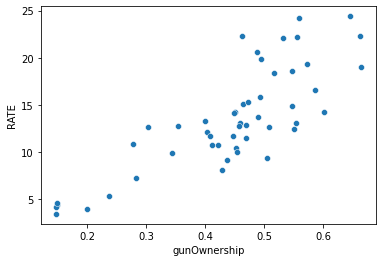

In [68]:
sns.scatterplot(x='gunOwnership',y="RATE", data=own_and_death)

## Merging on two variables

There are at least two unsatisfying things about the analysis above. First, we only have one year of data for each state. Second, they aren't even technically from the same year!

To rectify this, and learn some more about merging along the way, we will import some data created by the Rand Corporation. (To tie together another theme of class, Rand was also an early hotbed of research on Game Theory in the mid 20th century.)




In [70]:
rand_gunown = pd.read_csv("rand_gunown.csv")
rand_gunown.shape

(1850, 3)

In [97]:
rand_gunown

,Year,STATE,HFR
0,1980,Alabama,0.608
1,1981,Alabama,0.597
2,1982,Alabama,0.661
3,1983,Alabama,0.586
4,1984,Alabama,0.624
...,...,...,...
1845,2012,Wyoming,0.597
1846,2013,Wyoming,0.613
1847,2014,Wyoming,0.608
1848,2015,Wyoming,0.549


In [73]:
gd.columns

Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'URL'], dtype='object')

In [74]:
rand_gunown.columns

Index(['Year', 'STATE', 'HFR'], dtype='object')

In [75]:
gd.STATE

0      AL
1      AK
2      AZ
3      AR
4      CA
       ..
345    VA
346    WA
347    WV
348    WI
349    WY
Name: STATE, Length: 350, dtype: object

In [91]:
gd_clean = gd.rename({"YEAR":"Year", "STATE":"Code", "RATE":"Deathrate"}, axis=1)
gd_clean

,Year,Code,Deathrate,DEATHS,URL
0,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
1,2019,AK,24.4,179,/nchs/pressroom/states/alaska/ak.htm
2,2019,AZ,15.1,1136,/nchs/pressroom/states/arizona/az.htm
3,2019,AR,19.3,580,/nchs/pressroom/states/arkansas/ar.htm
4,2019,CA,7.2,2945,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
345,2005,VA,11.5,888,/nchs/pressroom/states/virginia/virginia.htm
346,2005,WA,8.8,567,/nchs/pressroom/states/washington/washington.htm
347,2005,WV,13.8,261,/nchs/pressroom/states/westvirginia/westvirgin...
348,2005,WI,8.5,474,/nchs/pressroom/states/wisconsin/wisconsin.htm


In [92]:
gd_clean = gd_clean.drop(["DEATHS", "URL"], axis=1)
gd_clean

,Year,Code,Deathrate
0,2019,AL,22.2
1,2019,AK,24.4
2,2019,AZ,15.1
3,2019,AR,19.3
4,2019,CA,7.2
...,...,...,...
345,2005,VA,11.5
346,2005,WA,8.8
347,2005,WV,13.8
348,2005,WI,8.5


In [93]:
crosswalk = crosswalk.rename({"State":"Statename"}, axis=1)
crosswalk

,Statename,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [95]:
gd_withcode = pd.merge(gd_clean, crosswalk, on="Code", how="left")
gd_withcode.shape

(350, 5)

In [96]:
gd_withcode

,Year,Code,Deathrate,Statename,Abbrev
0,2019,AL,22.2,Alabama,Ala.
1,2019,AK,24.4,Alaska,Alaska
2,2019,AZ,15.1,Arizona,Ariz.
3,2019,AR,19.3,Arkansas,Ark.
4,2019,CA,7.2,California,Calif.
...,...,...,...,...,...
345,2005,VA,11.5,Virginia,Va.
346,2005,WA,8.8,Washington,Wash.
347,2005,WV,13.8,West Virginia,W.Va.
348,2005,WI,8.5,Wisconsin,Wis.


In [99]:
rand_gunown = rand_gunown.rename({"STATE":"Statename"}, axis=1)

In [101]:
sy_all = pd.merge(gd_withcode, rand_gunown, on=["Statename", "Year"], how="outer")
sy_all.shape

(2000, 6)

In [102]:
sy_all

,Year,Code,Deathrate,Statename,Abbrev,HFR
0,2019,AL,22.2,Alabama,Ala.,NaN
1,2019,AK,24.4,Alaska,Alaska,NaN
2,2019,AZ,15.1,Arizona,Ariz.,NaN
3,2019,AR,19.3,Arkansas,Ark.,NaN
4,2019,CA,7.2,California,Calif.,NaN
...,...,...,...,...,...,...
1995,2009,NaN,NaN,Wyoming,NaN,0.615
1996,2010,NaN,NaN,Wyoming,NaN,0.572
1997,2011,NaN,NaN,Wyoming,NaN,0.539
1998,2012,NaN,NaN,Wyoming,NaN,0.597


In [107]:
np.sum(sy_all[sy_all.Year==2019].HFR.isna())

50

In [108]:
np.sum(sy_all[sy_all.Year==2000].HFR.isna())

0

In [109]:
pd.crosstab(sy_all.Year, sy_all.HFR.isna())

HFR,False,True
Year,,
1980,50,0
1981,50,0
1982,50,0
1983,50,0
1984,50,0
1985,50,0
1986,50,0
1987,50,0
1988,50,0


In [110]:
pd.crosstab(sy_all.Year, sy_all.Deathrate.isna())

Deathrate,False,True
Year,,
1980,0,50
1981,0,50
1982,0,50
1983,0,50
1984,0,50
1985,0,50
1986,0,50
1987,0,50
1988,0,50


In [118]:
sy_inner = pd.merge(gd_withcode, rand_gunown, on=["Statename", "Year"], how="inner")
sy_inner.shape

(200, 6)

In [120]:
sy_inner.Year.value_counts()

2016    50
2015    50
2014    50
2005    50
Name: Year, dtype: int64

In [121]:
smf.ols("Deathrate ~ HFR", data=sy_all).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Deathrate   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     269.9
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           7.89e-39
Time:                        10:31:22   Log-Likelihood:                -498.44
No. Observations:                 200   AIC:                             1001.
Df Residuals:                     198   BIC:                             1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3569      0.619      3.810      0.000       1.137       3.577
HFR           25.0684      1.526     16.428      0.000      22.059      28.078
==============================================================================
Omnibus:                        3.078   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.905
Skew:                           0.229   Prob(JB):                        0.234
Kurtosis:                       2.628   Cond. No.                         8.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
smf.ols("Deathrate ~ HFR", data=sy_inner).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Deathrate   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     269.9
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           7.89e-39
Time:                        10:31:32   Log-Likelihood:                -498.44
No. Observations:                 200   AIC:                             1001.
Df Residuals:                     198   BIC:                             1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3569      0.619      3.810      0.000       1.137       3.577
HFR           25.0684      1.526     16.428      0.000      22.059      28.078
==============================================================================
Omnibus:                        3.078   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.905
Skew:                           0.229   Prob(JB):                        0.234
Kurtosis:                       2.628   Cond. No.                         8.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
smf.ols("Deathrate ~ HFR + Code + Year", data=sy_all).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Deathrate   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     61.69
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           5.85e-78
Time:                        10:18:48   Log-Likelihood:                -274.17
No. Observations:                 200   AIC:                             652.3
Df Residuals:                     148   BIC:                             823.9
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -335.9510     36.269     -9.263      0.000    -407.623    -264.279
Code[T.AL]    -1.1101      0.828     -1.340      0.182      -2.747       0.526
Code[T.AR]    -2.6883      0.841     -3.197      0.002      -4.350      -1.026
Code[T.AZ]    -2.9434      1.054     -2.792      0.006      -5.027      -0.860
Code[T.CA]    -6.5853      1.544     -4.266      0.000      -9.636      -3.535
Code[T.CO]    -5.0417      1.037     -4.863      0.000      -7.090      -2.993
Code[T.CT]    -9.9442      1.491     -6.669      0.000     -12.891      -6.997
Code[T.DE]    -6.2086      1.151     -5.394      0.000      -8.483      -3.934
Code[T.FL]    -4.8211      1.251     -3.853      0.000      -7.294      -2.348
Code[T.GA]    -4.0850      1.024     -3.991      0.000      -6.108      -2.062
Code[T.HI]    -9.9679      1.840     -5.419      0.000     -13.603      -6.333
Code[T.IA]    -9.6328      1.078     -8.937      0.000     -11.763      -7.503
Code[T.ID]    -6.1622      0.792     -7.780      0.000      -7.727      -4.597
Code[T.IL]    -6.0044      1.389     -4.322      0.000      -8.750      -3.259
Code[T.IN]    -5.2689      0.985     -5.349      0.000      -7.215      -3.322
Code[T.KS]    -6.7401      0.986     -6.839      0.000      -8.688      -4.793
Code[T.KY]    -4.4860      0.845     -5.308      0.000      -6.156      -2.816
Code[T.LA]     0.4588      0.849      0.540      0.590      -1.219       2.136
Code[T.MA]   -10.2466      1.775     -5.771      0.000     -13.755      -6.738
Code[T.MD]    -4.0843      1.443     -2.831      0.005      -6.935      -1.234
Code[T.ME]    -9.7394      0.927    -10.509      0.000     -11.571      -7.908
Code[T.MI]    -5.9765      1.075     -5.559      0.000      -8.101      -3.852
Code[T.MN]   -10.4210      1.058     -9.854      0.000     -12.511      -8.331
Code[T.MO]    -2.9565      0.854     -3.462      0.001      -4.644      -1.269
Code[T.MS]    -1.1041      0.832     -1.327      0.187      -2.749       0.540
Code[T.MT]    -3.9788      0.808     -4.927      0.000      -5.575      -2.383
Code[T.NC]    -4.5872      1.100     -4.171      0.000      -6.761      -2.414
Code[T.ND]    -8.6643      0.799    -10.838      0.000     -10.244      -7.084
Code[T.NE]    -8.8383      1.048     -8.435      0.000     -10.909      -6.768
Code[T.NH]    -9.5994      1.001     -9.590      0.000     -11.577      -7.621
Code[T.NJ]    -8.1167      1.781     -4.557      0.000     -11.637      -4.597
Code[T.NM]    -0.9920      1.047     -0.947      0.345      -3.062       1.078
Code[T.NV]    -1.5065      1.120     -1.345      0.181      -3.720       0.707
Code[T.NY]    -9.7222      1.631     -5.961      0.000     -12.945      -6.499
Code[T.OH]    -6.5790      1.031     -6.379      0.000      -8.617      -4.541
Code[T.OK]    -2.8059      0.842     -3.334      0.001      -4.469      -1.143
Co

## Your turn

You can get data on gun ownership by country <a href="https://worldpopulationreview.com/country-rankings/gun-ownership-by-country">here</a> and gun homicides <a href="https://worldpopulationreview.com/country-rankings/gun-deaths-by-country">here</a>

See if you can:
- Download both in .csv format
- Upload the .csv files to your datahub folder
- Merge the two data files, checking tha the merge worked!
- Create a scatterplot with gun ownership on the x axis and gun deaths on the y axis.